# BioDiversity Project

## Introduction

Overall:
* The Majority of the Species in US National Parks are Healthy (96.7%)
* Yellowstone has the highest observations across surveyed species, followed by Yosemite, Bryce, then Smoky Mountains

Analysis of Endangered Species:
* Endangered species are observed slightly less on average than healthy species
* Of the 3% of species on Conservation Watch, most are classified as Species of Concern, with fewer Endangered, Threatened, or In Recovery
* Birds, Mammals, and Vascular Plants are the most common endangered Species

Recommendations:
* To reduce the quantity of species under conservation watch, make an intentional effort to preserve the population of birds, mammals and varcular plants
* To reduce the number of Threatened species, undergo efforts to protect fish and amphibian populations 

Birds, Mammals, and Vascular Plants are the most common endangered Species

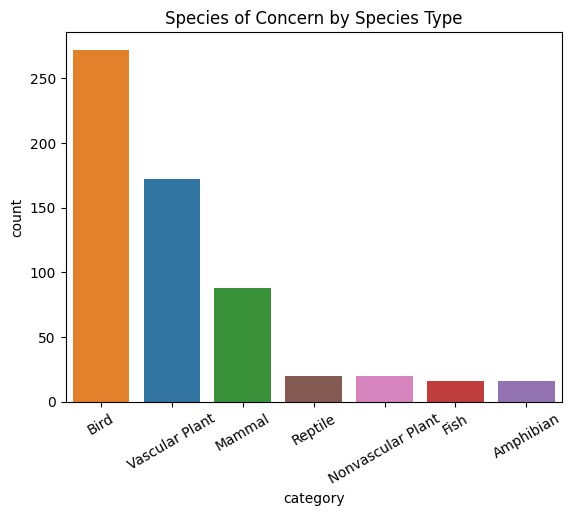

Of all Endangered Classifications, Species of Concern is the most common

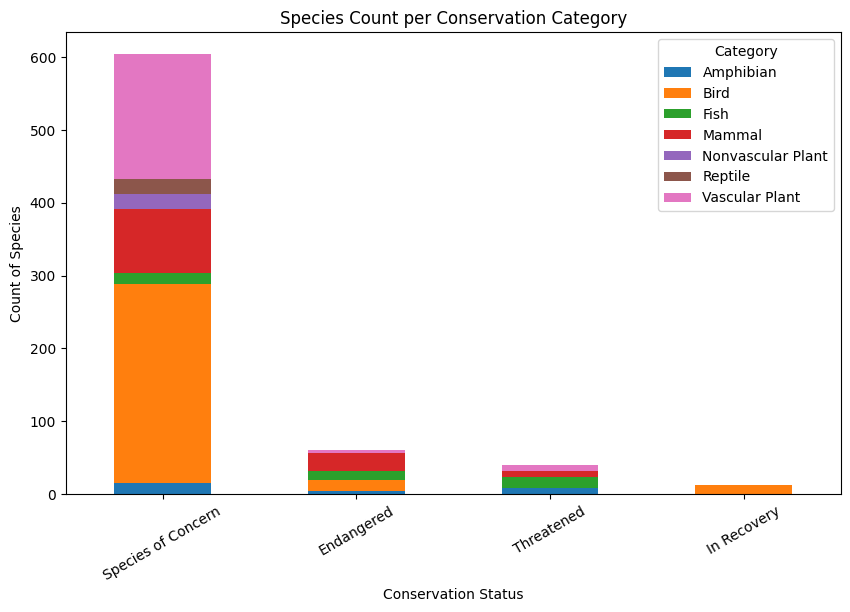

Yellowstone National Park has the highest average observation of Species 

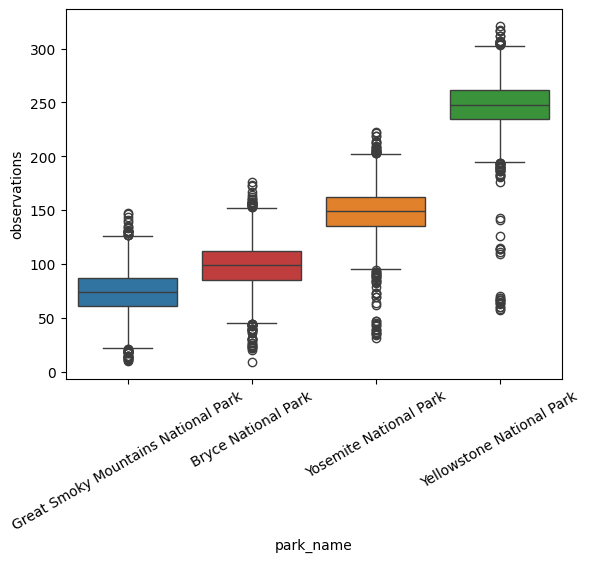

# 1) Python SetUp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_obs = pd.read_csv("/Users/drewpeterson/Documents/Programming/Python/CodeCademy/biodiversity_starter/observations.csv")
df_species = pd.read_csv("/Users/drewpeterson/Documents/Programming/Python/CodeCademy/biodiversity_starter/species_info.csv")

# 2) Exploration

Each DataFrame has 5541 unique scientific names

Remove excess rows!!

In [4]:
df_species.scientific_name.nunique()

5541

In [5]:
df_obs.scientific_name.nunique()

5541

In [6]:
(sorted(df_species.scientific_name.unique()) == sorted(df_obs.scientific_name.unique()))

True

## Species Data

In [7]:
# Glance at Data
df_species.head(3)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN


In [8]:
df_species.conservation_status.isna().sum()

5633

In [9]:
df_species.conservation_status.value_counts(dropna=False)

conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [10]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


## Observations Data

In [11]:
# Numercial Data
    # Observations: Mean 142, Median 124, Min 9, Max 321
df_obs.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [12]:
# Categorical Data 
    # DUPLICATES: Scientific Name and Park Name 
     # Some Scientific Names are repeated as many as 12 times, all repeated at least 4
df_obs.scientific_name.value_counts()

scientific_name
Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: count, Length: 5541, dtype: int64

# 3) Cleaning Observation Data

ISSUE:
* Each species should only have 1 row for each park
* In the Observations data, some species/park pairs may have multiple values (57, 58, 59)

SOLUTION: 
* Find the median of the observations
* Remove duplicates

In [13]:
# There are 1096 repeated pairs of scientific name and park
(df_obs.groupby(["scientific_name", "park_name"]).observations.count() > 1).sum()

1096

In [14]:
# Each Unique Scientific Name should only have a valu_count of 4 (1 for each park)
df_obs.scientific_name.value_counts()

scientific_name
Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: count, Length: 5541, dtype: int64

In [15]:
# Exploring a Species with a value count of 12
df_obs[df_obs.scientific_name == "Myotis lucifugus"]

,scientific_name,park_name,observations
1603,Myotis lucifugus,Great Smoky Mountains National Park,57
7094,Myotis lucifugus,Yellowstone National Park,239
8308,Myotis lucifugus,Great Smoky Mountains National Park,59
9318,Myotis lucifugus,Bryce National Park,103
9738,Myotis lucifugus,Yosemite National Park,124
10759,Myotis lucifugus,Bryce National Park,108
11395,Myotis lucifugus,Great Smoky Mountains National Park,58
12562,Myotis lucifugus,Yellowstone National Park,233
13611,Myotis lucifugus,Yosemite National Park,134
15865,Myotis lucifugus,Bryce National Park,87


In [16]:
# NOTE: A single species has 3 entires for each park
# Each species should only have 1 entry per park
df_obs[df_obs.scientific_name == "Myotis lucifugus"].groupby("park_name").observations.count()

park_name
Bryce National Park                    3
Great Smoky Mountains National Park    3
Yellowstone National Park              3
Yosemite National Park                 3
Name: observations, dtype: int64

There are multiple rows with different count of observations

For example, "Myotis lucifugus" has 3 observation counts for the same park Great Smoky Mountains: 57, 58, 59

SOLUTION:
Take the median observations of the multiple rows 

In [17]:
df_obs.observations = df_obs.groupby(["scientific_name", "park_name"]).observations.transform(lambda x: round(x.median()))

In [18]:
df_obs.drop_duplicates(inplace=True)

In [19]:
# Now no combination of Scientific Name and Park Name are observed multuple times 
# Each scientific name and park name occur one time
(df_obs.groupby(["scientific_name", "park_name"]).observations.count() > 1).sum()

0

In [20]:
df_obs.scientific_name.value_counts()

scientific_name
Vicia benghalensis                       4
Climacium kindbergii                     4
Bromus grandis                           4
Carex torta                              4
Myosotis laxa                            4
                                        ..
Guiraca caerulea                         4
Saxifraga michauxii                      4
Amorpha georgiana                        4
Waldsteinia fragarioides ssp. doniana    4
Dichanthelium depauperatum               4
Name: count, Length: 5541, dtype: int64

In [21]:
df_obs.groupby("park_name").observations.count()

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: observations, dtype: int64

Now each species has 1 observation per park 
(previous duplicates, filled in with the median of the multiple entries & dropped duplicates)

# 4) Cleaning Species Data

ISSUE: 
* Each unique scientific name should have 1 row
* There are 283 rows where scientific name is repeated

SOLUTION:
* Remove duplicate scientific name
* Ensure the conservation status of duplicated rows are preserved when dropping excess rows

NOTE: There are some variance in common_names (somes row include more nicknames). This is deemed not essential for this analysis as the most important variable is information about endangered specises.

Dropping Duplicated rows results in the target of 5541 unique species

In [22]:
df_species.scientific_name.duplicated().sum()

283

In [23]:
5824 - 283

5541

Show every instance of "scientific_name" that are duplicated, sorted by conservation status & scientific name.

Confirm that duplicated rows of scientific names all have the same conservation status -- flag different conservation statuses within the same scientific name.
* "Canis lupus" -- Endangered (2), In Recovery (1), (keep "Gray Wolf, Wolf", 	"Endangered")
* "Oncorhynchus mykiss" -- Threatened (1), NaN (1), (threatened vs nan, keep threatened)

In [24]:
# pd.set_option("display.max_rows", 300)
# df_species[df_species.scientific_name.isin(df_species[df_species.scientific_name.duplicated()].scientific_name)].sort_values(by=["conservation_status", "scientific_name"])

In [25]:
df_species[df_species.scientific_name == "Canis lupus"]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [26]:
df_species[df_species.scientific_name == "Oncorhynchus mykiss"]

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


Step 1) Drop specific values for 2 species with duplicated rows that have different conservation statuses ("Canis lupus" & "Oncorhynchus mykiss")

In [27]:
# First 8 and 3020 correspond to Wolf and 560 corresponds to Oncorhynchus mykiss
df_species.drop([8,3020,560],inplace=True)

Step 2) Drop Remaining duplicate scientific_name rows (this preserves conservation status as all remaining duplicated rows have the same conservation status)

In [28]:
df_species.drop(df_species[df_species.scientific_name.duplicated()].index, inplace = True)

In [29]:
df_species.duplicated().sum()

0

In [30]:
df_species.shape

(5541, 4)

#  5) Merge Cleaned Data

In [31]:
# Merge Data Together on Shared Column "scientific_name"
df = df_obs.merge(df_species, on="scientific_name")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  716 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [33]:
(df.groupby(by=["scientific_name", "park_name"]).category.count() > 1).sum()

0

# 6) Clean Data!

# 7) Data Exploration

Yellowstone has the highest average observation -- followed by Yosemite

Observations were lower on average at Bryce and Great Smoky Mountains

In [34]:
df.groupby("park_name").observations.mean()

park_name
Bryce National Park                     98.936474
Great Smoky Mountains National Park     74.150514
Yellowstone National Park              247.891897
Yosemite National Park                 148.256271
Name: observations, dtype: float64

In [35]:
df.groupby("category").observations.mean()

category
Amphibian            137.408228
Bird                 140.452869
Fish                 139.550000
Mammal               136.181818
Nonvascular Plant    143.132883
Reptile              141.368590
Vascular Plant       142.898874
Name: observations, dtype: float64

Each Category of species had roughly the same average observation at each park

In [36]:
df.groupby(["category", "park_name"]).observations.mean()

category           park_name                          
Amphibian          Bryce National Park                     92.392405
                   Great Smoky Mountains National Park     71.164557
                   Yellowstone National Park              242.924051
                   Yosemite National Park                 143.151899
Bird               Bryce National Park                     99.127049
                   Great Smoky Mountains National Park     72.278689
                   Yellowstone National Park              244.309426
                   Yosemite National Park                 146.096311
Fish               Bryce National Park                     97.784000
                   Great Smoky Mountains National Park     72.544000
                   Yellowstone National Park              241.048000
                   Yosemite National Park                 146.824000
Mammal             Bryce National Park                     95.556818
                   Great Smoky Mountains Nationa

In [37]:
df[df.observations == df.observations.max()]

,scientific_name,park_name,observations,category,common_names,conservation_status
9249,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",NaN


In [38]:
df[df.observations == df.observations.min()]

,scientific_name,park_name,observations,category,common_names,conservation_status
2017,Corydalis aurea,Bryce National Park,9,Vascular Plant,"Golden Corydalis, Scrambled Eggs",NaN


In [39]:
df[df.conservation_status.isnull()].groupby("category").observations.mean()

category
Amphibian            141.211806
Bird                 143.834746
Fish                 144.677632
Mammal               142.273973
Nonvascular Plant    143.253049
Reptile              142.366438
Vascular Plant       143.103119
Name: observations, dtype: float64

In [40]:
# Endangered species are observed less on average 
df[~df.conservation_status.isnull()].groupby("category").observations.mean()

category
Amphibian             98.285714
Bird                 121.830000
Fish                  86.409091
Mammal               106.533333
Nonvascular Plant    135.250000
Reptile              126.800000
Vascular Plant       124.179348
Name: observations, dtype: float64

In [41]:
# Each type of species is viewed roughly around the same average times
df.groupby("category").observations.mean()

category
Amphibian            137.408228
Bird                 140.452869
Fish                 139.550000
Mammal               136.181818
Nonvascular Plant    143.132883
Reptile              141.368590
Vascular Plant       142.898874
Name: observations, dtype: float64

In [42]:
df_species[df_species.conservation_status.isnull()].count() / df_species.count()

category               0.967695
scientific_name        0.967695
common_names           0.967695
conservation_status    0.000000
dtype: float64

In [43]:
df_species[df_species.category == "Vascular Plant"].count() / df_species.count()

category               0.769175
scientific_name        0.769175
common_names           0.769175
conservation_status    0.256983
dtype: float64

# 8) Data Visualization

## Univariate Visualization

### Numerical Variable

Distribution of Observations exhibits bi-modality
* Observations above 200 are from Yosemite and Yellowstone
* Observations below 200 are mostly from Smoky Mountains and Bryce

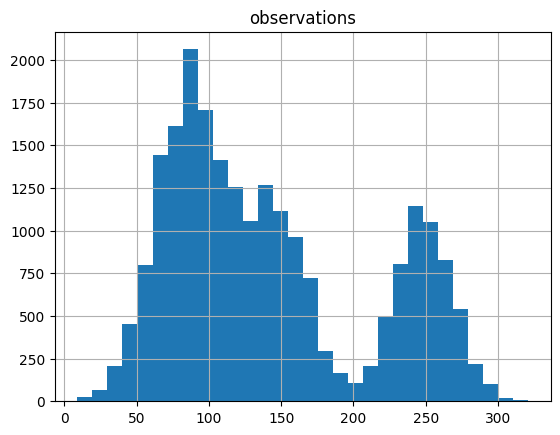

In [44]:
df.hist(bins=30);

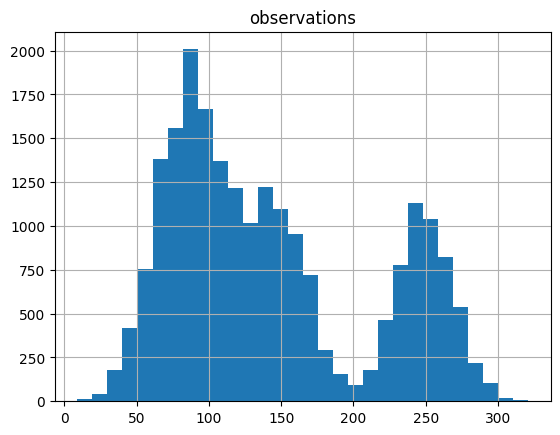

In [45]:
df[df.conservation_status.isnull()].hist(bins=30);

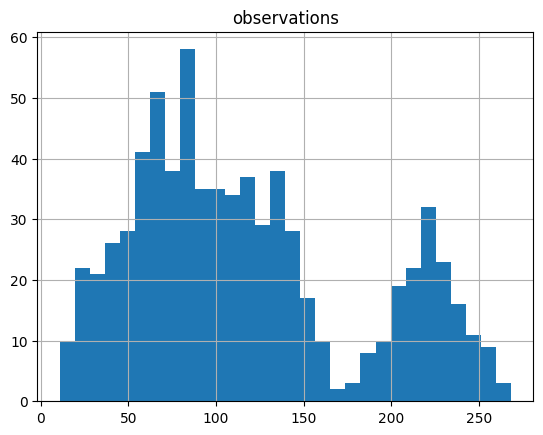

In [46]:
df[~df.conservation_status.isnull()].hist(bins=30);

### Further Exploring the Bi-modal distribution

Proportions of species categories and distribution of endangered vs healthy species are approximately identical in both modes

In [47]:
df[df.observations < 200].category.value_counts(normalize=True)

category
Vascular Plant       0.767651
Bird                 0.088617
Nonvascular Plant    0.059918
Mammal               0.032301
Fish                 0.022935
Amphibian            0.014529
Reptile              0.014049
Name: proportion, dtype: float64

In [48]:
df[df.observations > 200].category.value_counts(normalize=True)

category
Vascular Plant       0.774481
Bird                 0.085912
Nonvascular Plant    0.060794
Mammal               0.029851
Fish                 0.021478
Reptile              0.014197
Amphibian            0.013287
Name: proportion, dtype: float64

Most of the Data comes from Yellowstone in the second mode

In [49]:
df[df.observations < 200].park_name.value_counts(normalize=True)

park_name
Great Smoky Mountains National Park    0.332673
Bryce National Park                    0.332673
Yosemite National Park                 0.330812
Yellowstone National Park              0.003842
Name: proportion, dtype: float64

In [50]:
df[df.observations > 200].park_name.value_counts(normalize=True)

park_name
Yellowstone National Park    0.995268
Yosemite National Park       0.004732
Name: proportion, dtype: float64

### Categorical Variables

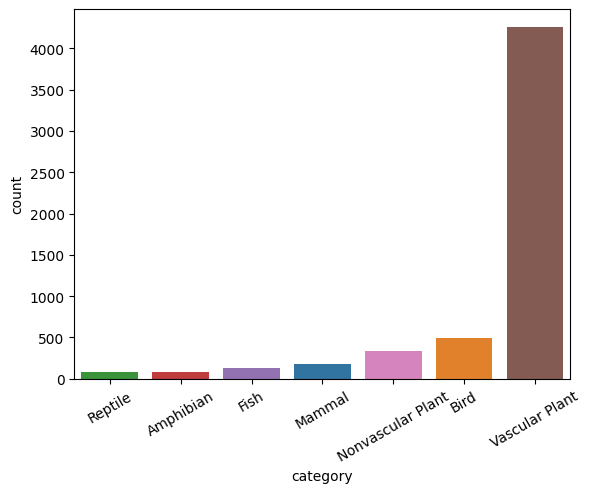

In [51]:
# Majority of the species tracked are Vascular Plants
sns.countplot(x="category", data=df_species, hue="category", order=df_species.category.value_counts(ascending=True).index);
plt.xticks(rotation=30);

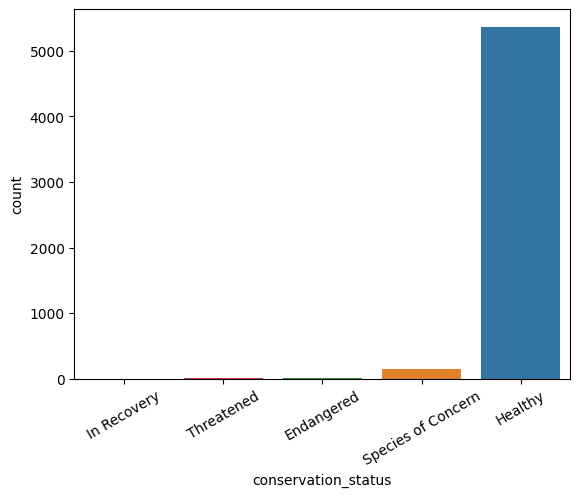

In [52]:
# Majority of the Species are Healthy
sns.countplot(x="conservation_status", data=df_species.fillna("Healthy"), hue="conservation_status", order=df_species.fillna("Healthy").conservation_status.value_counts(ascending=True).index);
plt.xticks(rotation=30);

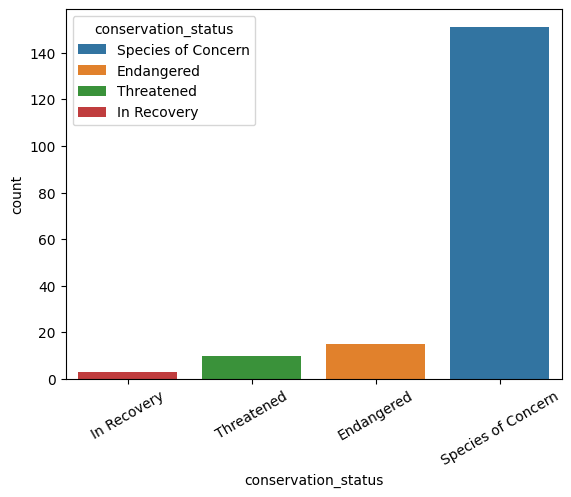

In [53]:
# Of the species on Conservation Watch, most are Species of Concern, with fewer Endangered, Threatened, or In Recovery
sns.countplot(x="conservation_status", data=df_species, hue="conservation_status", order=df_species.conservation_status.value_counts(ascending=True).index);
plt.xticks(rotation=30);

## Bivariate Visualization

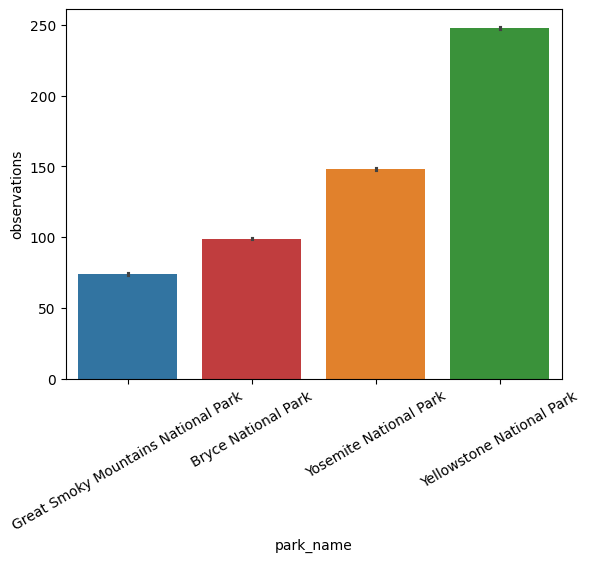

In [54]:
# On average Yellowstone had the highest mean observation count across all species
sns.barplot(x="park_name", y = "observations", data = df, hue="park_name", order=df.groupby("park_name").observations.mean().reset_index().sort_values(by="observations").park_name);
plt.xticks(rotation=30);

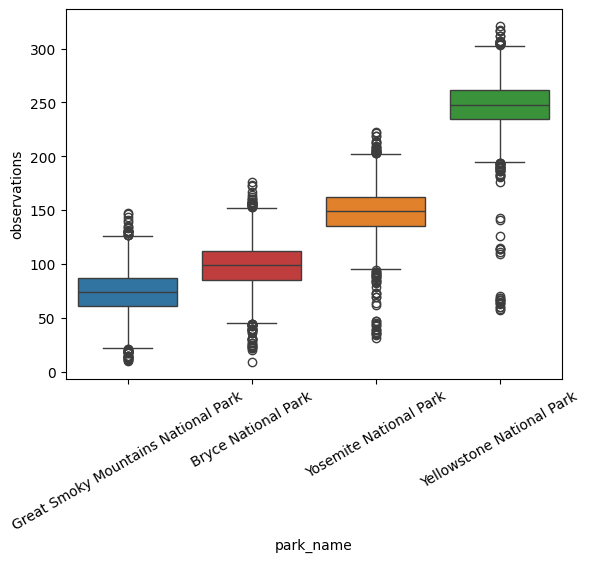

In [55]:
# Order of Ascending Observation counts: Smoky Mountains, Bryce, Yosemite, Yellowstone
sns.boxplot(x="park_name", y = "observations", data = df, hue="park_name", order=df.groupby("park_name").observations.mean().reset_index().sort_values(by="observations").park_name);
plt.xticks(rotation=30);

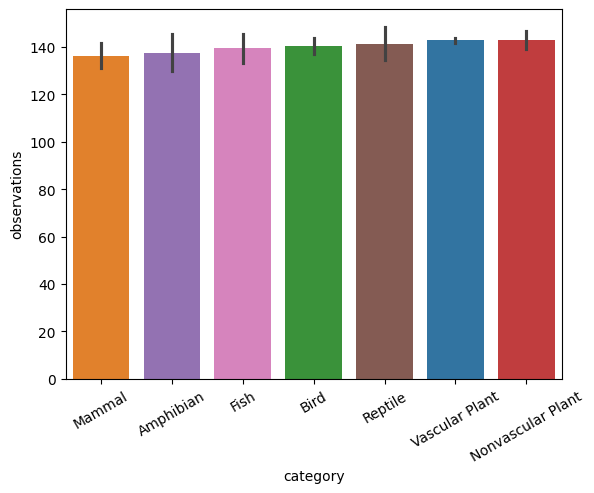

In [56]:
# Surprisingly, each type of category had roughly the same amount of average observations
# One may expect mammals or fish may be observed less than plants
sns.barplot(x="category", y = "observations", data = df, hue="category", order=df.groupby("category").observations.mean().reset_index().sort_values(by="observations").category);
plt.xticks(rotation=30);

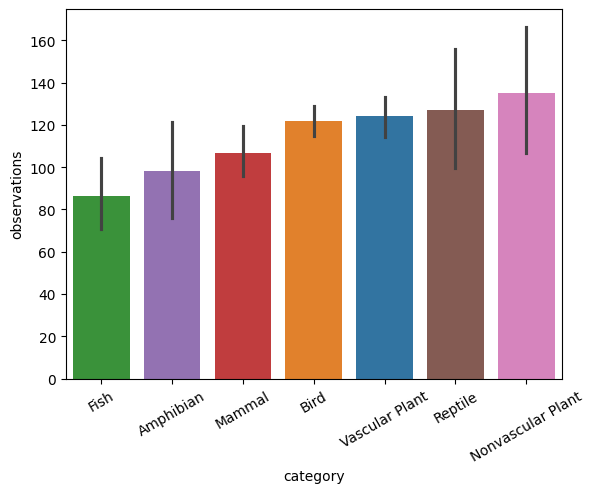

In [57]:
# However Endangered Species tend to be slightly less observed on average
sns.barplot(x="category", y = "observations", data = df[~df.conservation_status.isnull()], hue="category", order=df[~df.conservation_status.isnull()].groupby("category").observations.mean().reset_index().sort_values(by="observations").category);
plt.xticks(rotation=30);

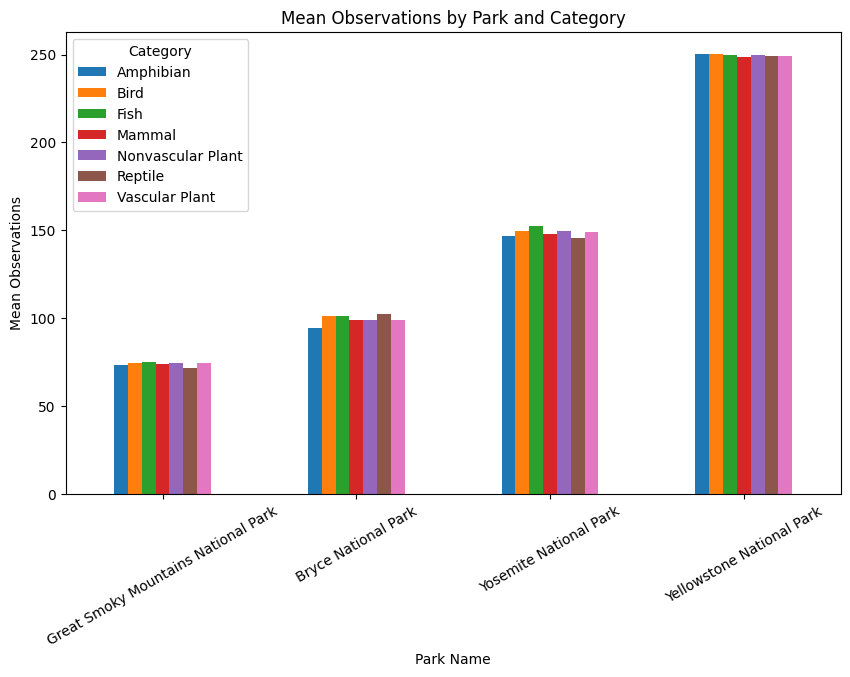

In [58]:
# Each Species Type is viewed the Same Average Amount of Times in Each Park
# NOTE: Referenced online resource to make this plot
grouped_data = df[df.conservation_status.isnull()].groupby(["park_name", "category"])["observations"].mean().unstack()

park_order = ['Great Smoky Mountains National Park', 'Bryce National Park', 'Yosemite National Park', 'Yellowstone National Park']
grouped_data = grouped_data.reindex(park_order)

grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Park Name')
plt.ylabel('Mean Observations')
plt.title('Mean Observations by Park and Category')
plt.legend(title='Category')
plt.xticks(rotation = 30)
plt.show()

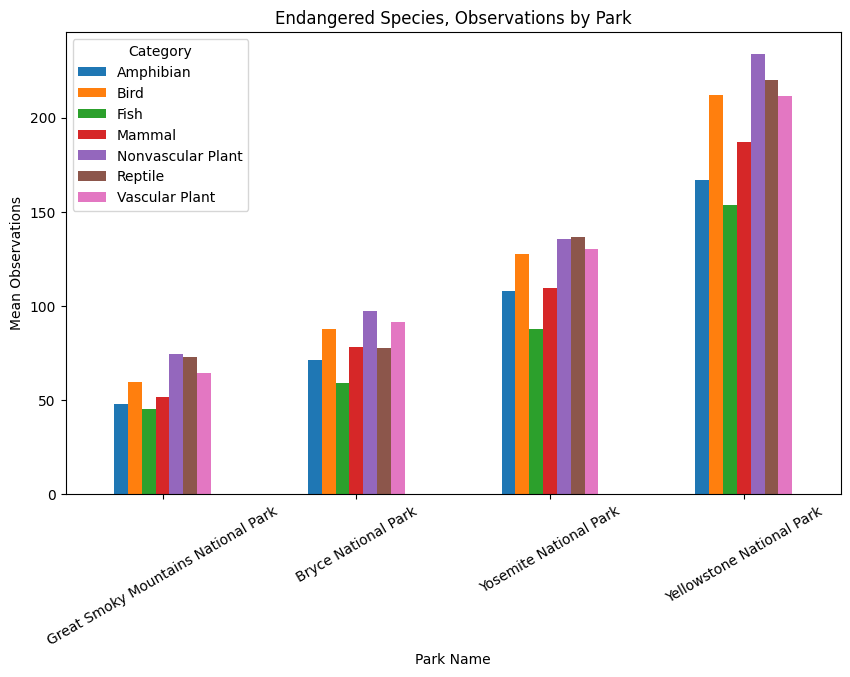

In [59]:
# In Endangered Species, the observations are viewed less, but in roughly the same ratio across each park
grouped_data_n = df[~df.conservation_status.isnull()].groupby(["park_name", "category"])["observations"].mean().unstack()

grouped_data_n = grouped_data_n.reindex(park_order)
grouped_data_n.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Park Name')
plt.ylabel('Mean Observations')
plt.title('Endangered Species, Observations by Park')
plt.legend(title='Category')
plt.xticks(rotation = 30)
plt.show()

In [60]:
# To view this numerically
# df.groupby(["park_name", "category"]).observations.mean()

# 9) Conservation Status by Species Type

Summary:
* Species of Concern: Birds comprised the largest proportion (45%)
* Endangered: Mammals comprised the largest proportion (40%)
* Threatened: Fish comprised the largest proportion (40%), no reptiles, birds, or nonvascular plants 
* In Recovery: Only Birds were present (100%)

<Axes: ylabel='count'>

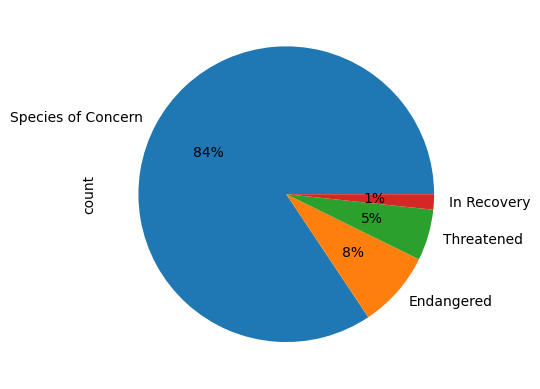

In [105]:
# Of the Species on the Conservation Watch, Most Are Categorized as Species of Concern
df_species.conservation_status.value_counts().plot.pie(autopct="%d%%")

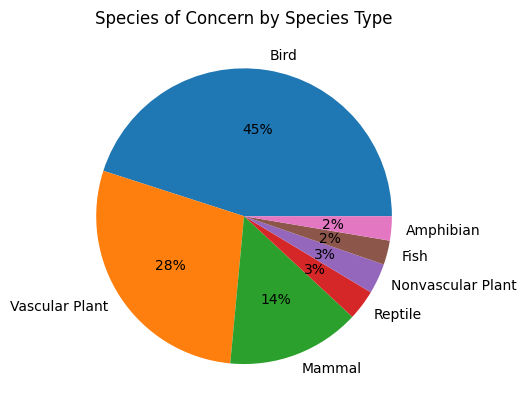

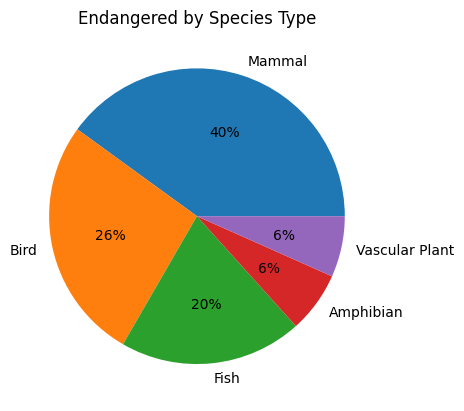

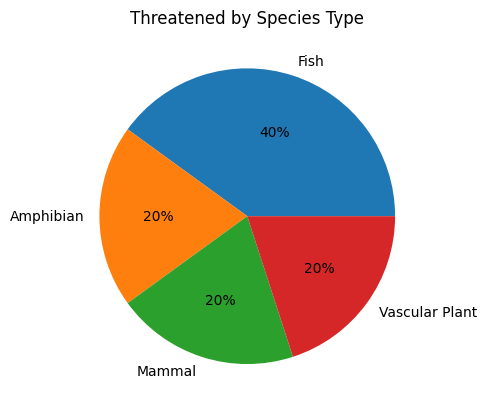

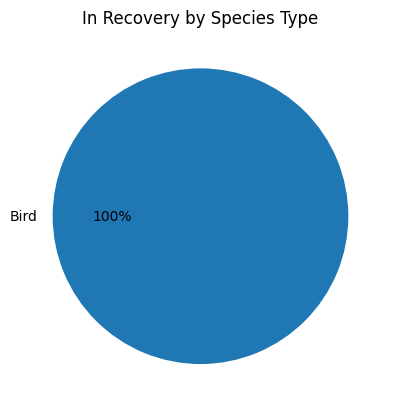

<Figure size 640x480 with 0 Axes>

In [61]:
for each_status in df.conservation_status.value_counts(normalize=True).index:
    plt.pie(df[df.conservation_status == each_status].category.value_counts(normalize=True), labels= df[df.conservation_status == each_status].category.value_counts(normalize=True).index, autopct = "%d%%");
    plt.title(f"{each_status} by Species Type");
    plt.show()
    plt.clf()

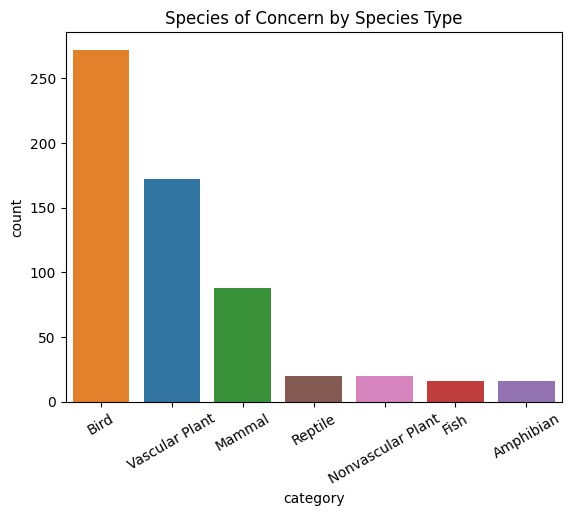

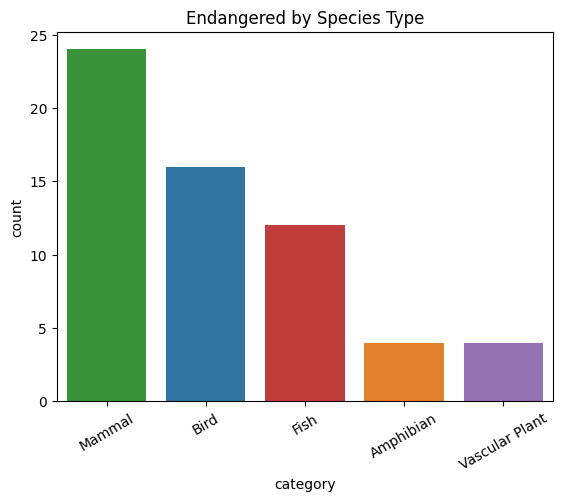

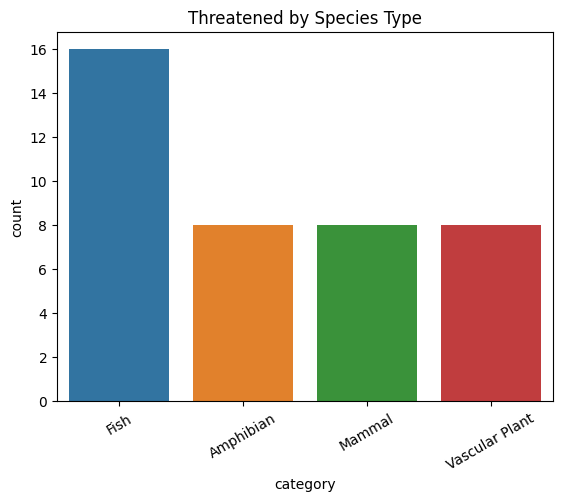

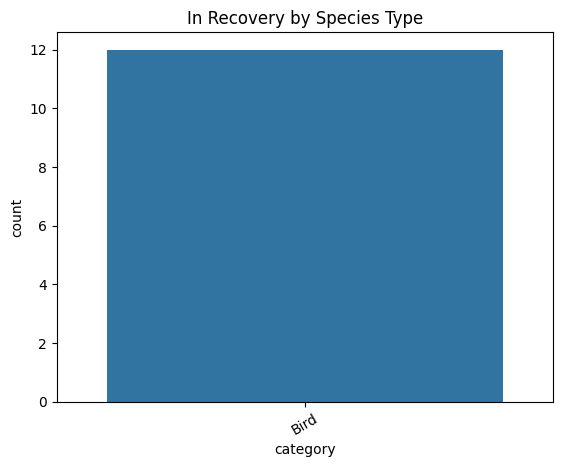

<Figure size 640x480 with 0 Axes>

In [62]:
# Same Data Displayed in Bar Chart instead of Pie Chart
for each_status in df.conservation_status.value_counts(normalize=True).index:
    sns.countplot(x= "category", data = df[df.conservation_status == each_status], hue="category", order=df[df.conservation_status == each_status].category.value_counts().index);
    plt.title(f"{each_status} by Species Type");
    plt.xticks(rotation=30)
    plt.show()
    plt.clf()

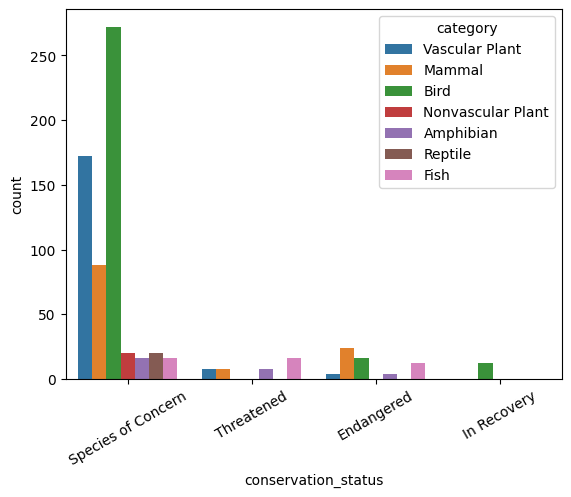

In [63]:
# Numbers of Species in each Conservation Category (Side-by-Side Bar Chart)
sns.countplot(x="conservation_status", data=df, hue="category");
plt.xticks(rotation=30);

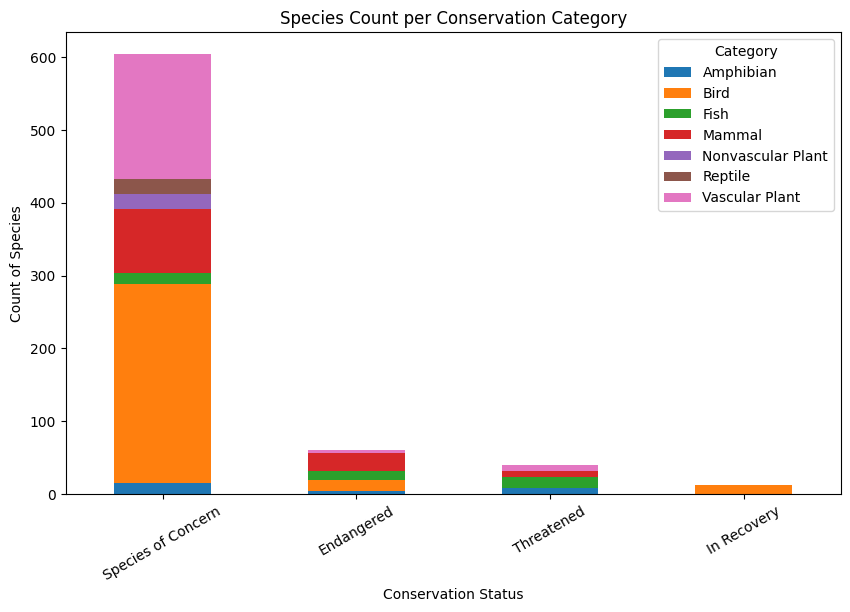

In [64]:
# Numbers of Species in each Conservation Category (Stacked Bar Chart)
# NOTE: Referenced online resource to make this plot
grouped_data_1 = df.groupby(["conservation_status", "category"])["observations"].count().unstack()

grouped_data_1 = grouped_data_1.reindex(['Species of Concern', 'Endangered', 'Threatened','In Recovery'])
# Plotting
grouped_data_1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Conservation Status')
plt.ylabel('Count of Species')
plt.title('Species Count per Conservation Category')
plt.legend(title='Category')
plt.xticks(rotation = 30)
plt.show()

# 10) Endangered Breakdown for Each Type of Species


Summary:
* Vasular Plant: Mostly Species of Concern, Small percent Threatened or Endangered
* Nonvascular Plant: Only Species of Concern
* Bird: Mostly Species of Concern, Small percent Threatened or Endangered
* Mammal: Over 25% Threatened or Endangered
* Fish: Balanced between Threatened, Endangered, and Species of Concern
* Amphibian: Over 40% Threatened or Endangered
* Reptile: Only Species of Concern

<Axes: xlabel='category'>

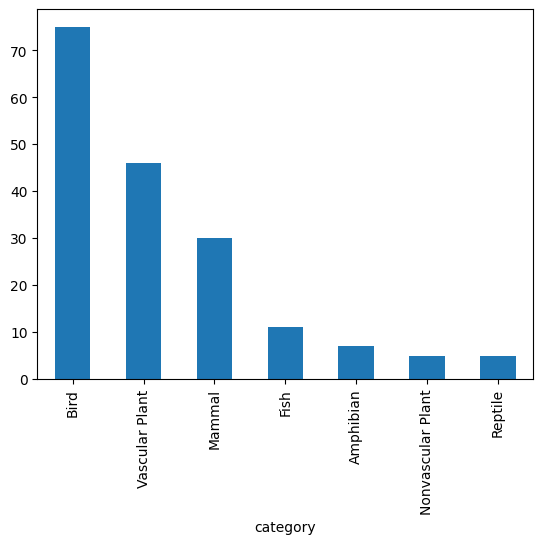

In [121]:
# Total Number of Species in Each Category on Conservation Watch 
# Pie Chart is too Convoluted: df_species.groupby("category").conservation_status.count().plot.pie(autopct="%d%%")
df_species.groupby("category").conservation_status.count().sort_values(ascending=False).plot.bar()

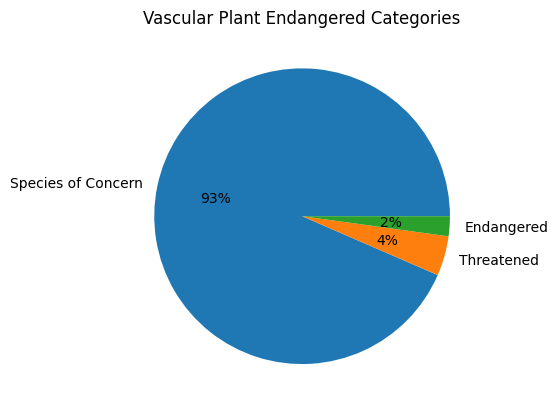

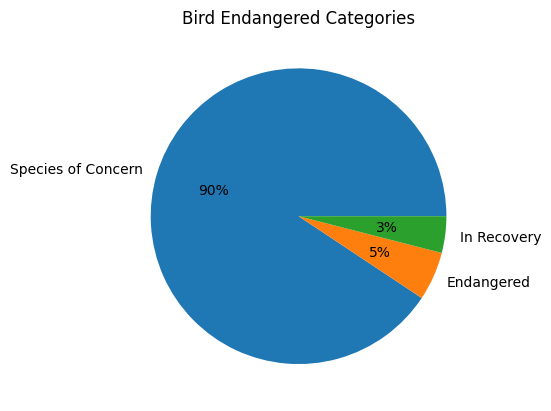

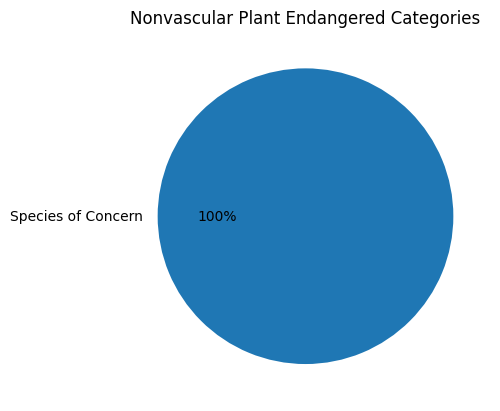

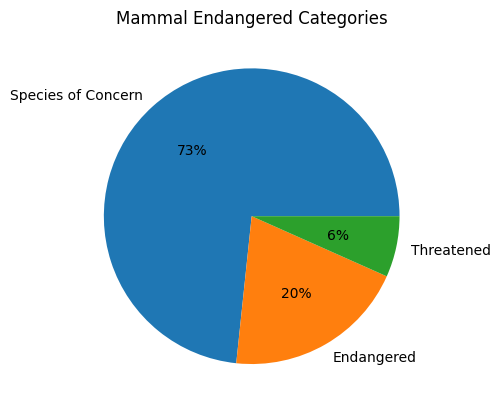

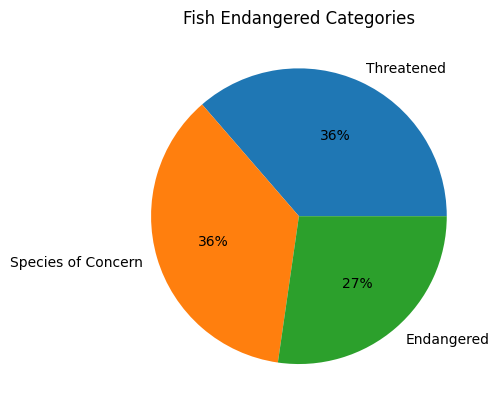

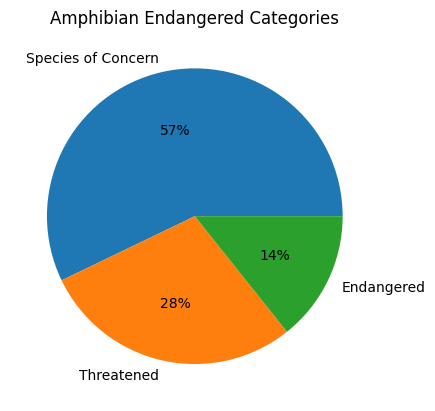

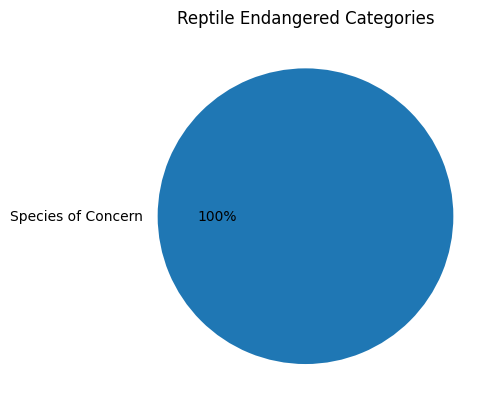

<Figure size 640x480 with 0 Axes>

In [66]:
for each_species in df.category.value_counts(normalize=True).index:
    plt.pie(df[df.category == each_species].conservation_status.value_counts(normalize=True), labels= df[df.category == each_species].conservation_status.value_counts(normalize=True).index, autopct = "%d%%");
    plt.title(f"{each_species} Endangered Categories");
    plt.show()
    plt.clf()

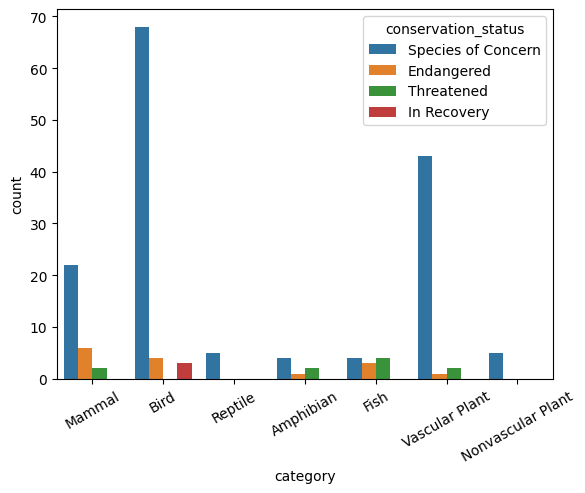

In [67]:
# Total Number of Endangered Category per Species Type (Side-by-Side Bar Chart)
sns.countplot(x="category", data=df_species, hue="conservation_status");
plt.xticks(rotation=30);

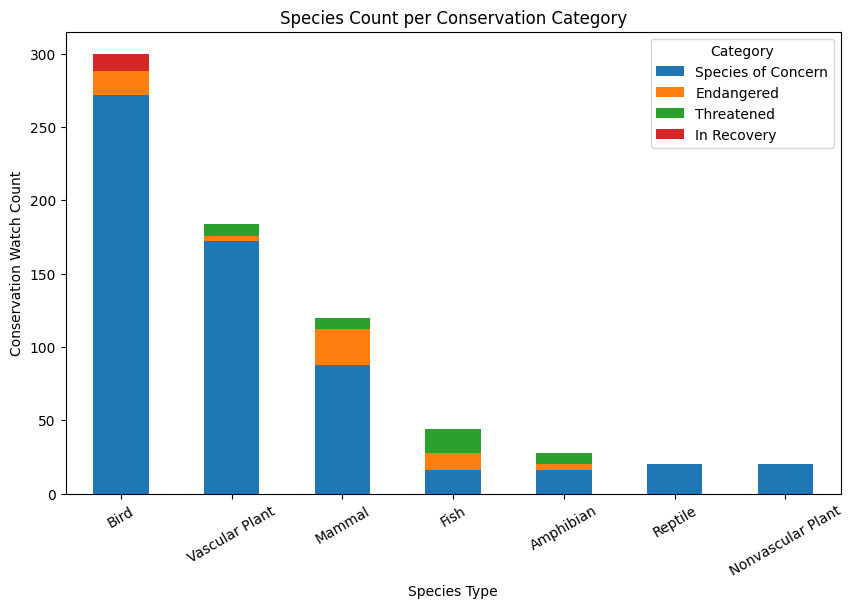

In [101]:
# Total Number of Endangered Category per Species Type (Stacked Bar Chart)
# Numbers of Species in each Conservation Category (Stacked Bar Chart)
grouped_data_2 = df.groupby(["category","conservation_status"])["observations"].count().unstack()

grouped_data_2 = grouped_data_2.reindex(df_species[~df_species.conservation_status.isnull()].category.value_counts().index)
grouped_data_2 = grouped_data_2[df_species[~df_species.conservation_status.isnull()].conservation_status.value_counts().index]

grouped_data_2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Species Type')
plt.ylabel('Conservation Watch Count')
plt.title('Conservation Category by Species Type')
plt.legend(title='Category')
plt.xticks(rotation = 30)
plt.show()

# 11) Observations of Endangered Species by Park

QUESTION: Are endangered species more observed in any particular park?

ANSWER: The observation of endangered species follows the overall trend in observation numbers (highest observations in Yellowstone, Yosemite, Bryce, then Smoky Mountains)

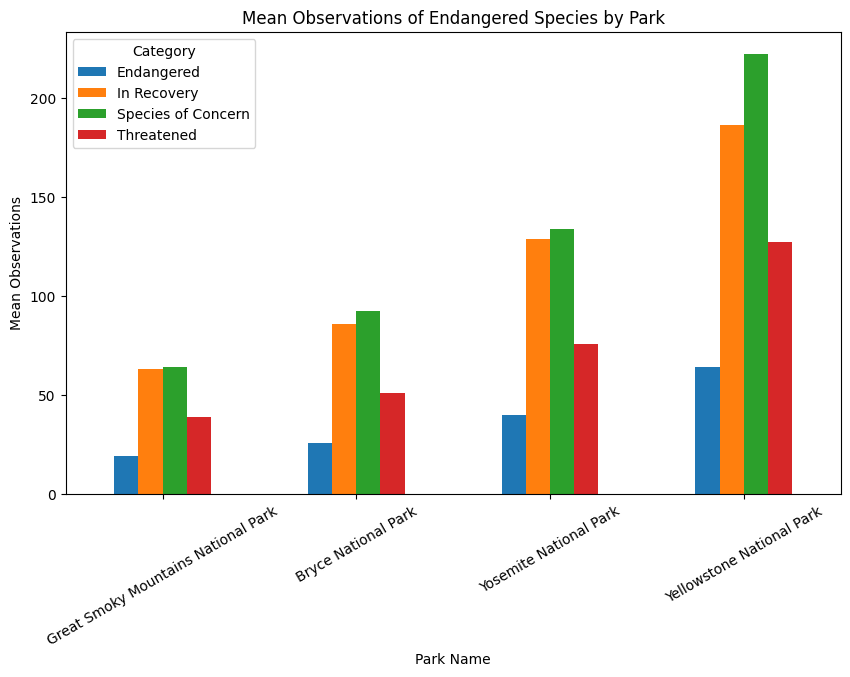

In [81]:
# Comparing Observations of Conservation Species by Park
grouped_data = df.groupby(["park_name", "conservation_status"])["observations"].mean().unstack()

grouped_data = grouped_data.reindex(park_order)
# Plotting
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Park Name')
plt.ylabel('Mean Observations')
plt.title('Mean Observations of Endangered Species by Park')
plt.legend(title='Category')
plt.xticks(rotation = 30)
plt.show()

# 12) Summary

Overall:
* Majority of the Species are Healthy (96.7%)
* Of the 3% of species on Conservation Watch, most are Species of Concern (2.7%), with fewer Endangered (0.27%), Threatened (0.27%), or In Recovery (0.05%)
* Majority of the species tracked are Vascular Plants (77%)

By Park
* Yellowstone has the highest observations across all species, followed by Yosemite, Bryce, then Smoky Mountains
* Each category of species has roughly the same average number of observations in each park
* QUESTION: Are endangered species more observed in any particular park?
* ANSWER: The observation of endangered species follows the overall trend in observation numbers (highest observations in Yellowstone, Yosemite, Bryce, then Smoky Mountains)

Endangered Species
* Endangered species are observed slightly less on average than healthy species

By Conservation Status:
* Species of Concern: Birds comprised the largest proportion (45%)
* Endangered: Mammals comprised the largest proportion (40%)
* Threatened: Fish comprised the largest proportion (40%), no reptiles, birds, or nonvascular plants 
* In Recovery: Birds are the only category present (100%)

Recommendation:
* To reduce the quantity of species under conservation watch, make an effort to preserve the population of birds, mammals and varcular plants
* To reduce Threatened species, protect fish and amphibian populations 